In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

DATA COLLECTION AND ANALYSIS

In [2]:
data = pd.read_csv('C:\\Users\\g7gay\\OneDrive\\Desktop\\Projects\\Wine_Quality\\winequality-red.csv')

In [3]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

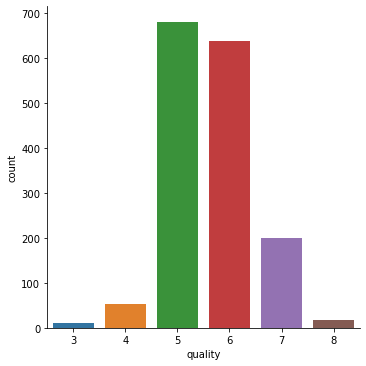

In [4]:
# number of values for each quality

sns.catplot(x='quality', data = data, kind = 'count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

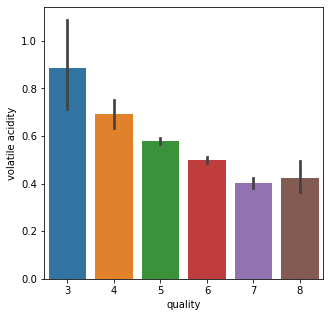

In [5]:
# volatile acidity vs quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y= 'volatile acidity', data = data)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

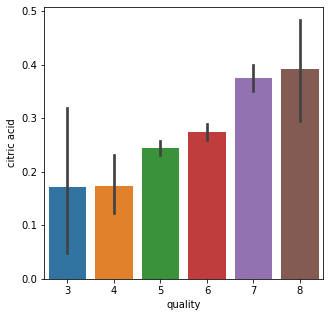

In [6]:
# citric acid vs quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y= 'citric acid', data = data)

CORRELATION

1. Positive Correlation
2. Negative Correlation

In [7]:
correlation = data.corr()

<AxesSubplot:>

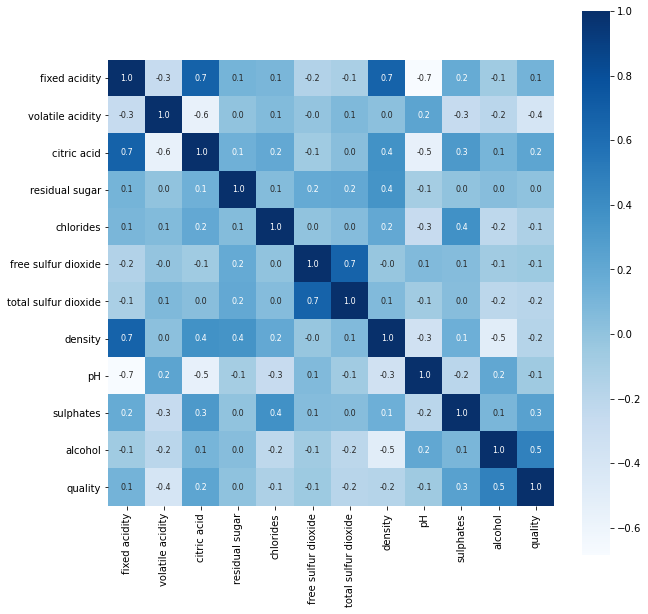

In [16]:
# constructing a heatmap to understand the correlation between the columns

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

# darker value -> positive correlation
# lighter value -> negative correlation

In [17]:
# seperating the datasets and labels

x = data.drop(columns='quality', axis =1)
y = data['quality']

LABEL BINARIZATION

In [18]:
y = data['quality'].apply(lambda y_value :1 if y_value>=7 else 0)

In [19]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, stratify = y, random_state=2)

MODEL TRAINING - RANDOM FOREST CLASSIFIER

In [21]:
model = RandomForestClassifier()

In [22]:
model.fit(x_train, y_train)

RandomForestClassifier()

MODEL EVALUATION

In [24]:
x_test_prediction = model.predict(x_test)
test_accuracy = accuracy_score(x_test_prediction, y_test)
print("The accuracy of the model is : ",test_accuracy)

The accuracy of the model is :  0.940625


BUILD A PREDICTIVE SYSTEM

In [25]:
idata = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

data_arr = np.asarray(idata)

# reshaping the data as we are predicting for only one instance

reshaped = data_arr.reshape(1,-1)


prediction = model.predict(reshaped)

print(prediction)

if (prediction == 0):
    print("Poor quality wine")
else:
    print("Good quality wine")

[1]
Good quality wine
